In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd  
import numpy as  np 
import matplotlib.pyplot as plt
%matplotlib inline


In [43]:
data = load_iris()
type(data)

sklearn.utils._bunch.Bunch

In [44]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [45]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [46]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['species'] = data.target

In [47]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
X = df.iloc[:,:-1].values
y = df ['species'].values

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [50]:
from sklearn.svm import SVC


In [51]:
results = {'model':[],'mean':[],'standard deviation':[]}

def scores (model,x):
    mean_accuracy = np.mean(x)
    std_deviation = np.std(x)

    results['model'].append(model)
    results['mean'].append(mean_accuracy)
    results['standard deviation'].append(std_deviation)
    


In [52]:
scores('SVM',cross_val_score(SVC(),X_train,y_train))
scores('LogisticRegression',cross_val_score(LogisticRegression(),X_train,y_train))
scores('DecisionTreeClassifier',cross_val_score(DecisionTreeClassifier(),X_train,y_train))
scores('RandomForestClassifier',cross_val_score(RandomForestClassifier(n_estimators=100),X_train,y_train))
scores('KNeighborsClassifier',cross_val_score(KNeighborsClassifier(n_neighbors=5),X_train,y_train))


In [53]:
res = pd.DataFrame(results)
res.head(5)

,model,mean,standard deviation
0,SVM,0.941667,0.042492
1,LogisticRegression,0.958333,0.064550
2,DecisionTreeClassifier,0.933333,0.042492
3,RandomForestClassifier,0.950000,0.040825
4,KNeighborsClassifier,0.966667,0.048591


In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)


1.0

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

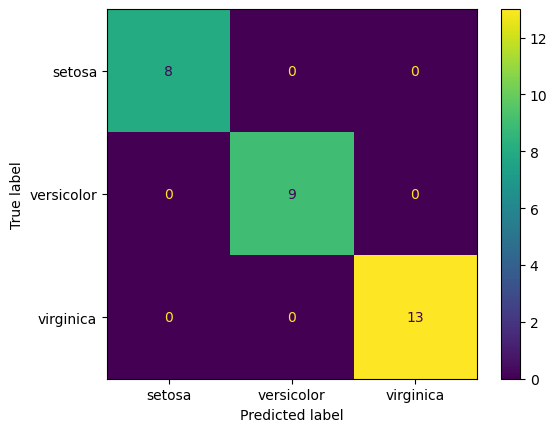

In [56]:
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(cm,display_labels=data.target_names)
disp.plot()

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 1.0000


In [58]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

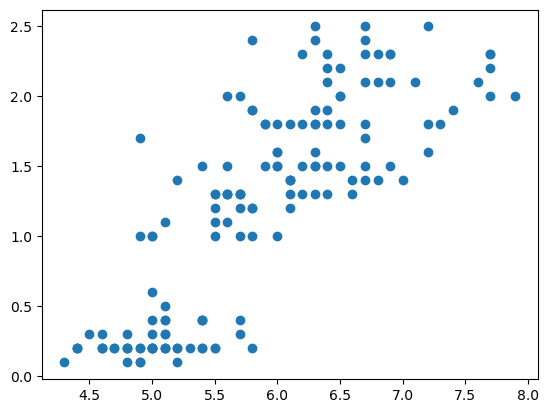

In [62]:
plt.scatter(df["sepal length (cm)"],df['petal width (cm)'])